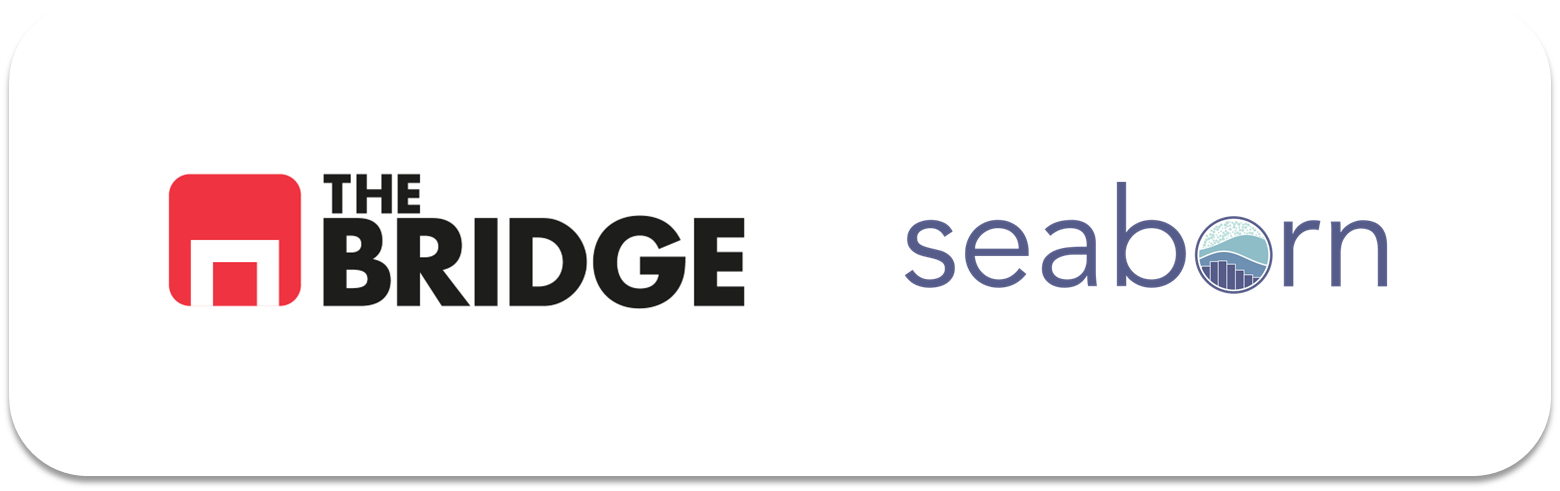

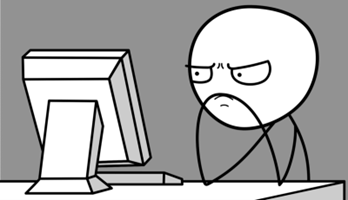

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [7]:
df_viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [3]:
def analizar_columnas_categoricas(df,col1,col2):
    fig,axes = plt.subplots(1,2, figsize=(14,5)) #Frecuencia absoluta de cada columna
    sns.countplot(data=df, x=col1, ax=axes[0])
    axes[0].set_title(f'Frecuencia de {col1}')
    sns.countplot(data=df, x=col2, ax=axes[1])
    axes[1].set_title(f'Frecuencia de {col2}')
    plt.tight_layout()
    plt.show()

    sns.catplot(data=df, x=col1, kind="count", col=col2, height=4, aspect=1) #Gráfico combinado con catplot
    plt.show()

    tabla=pd.crosstab(df[col1], df[col2]) #Tabla de contingencia
    print("Tabla de contingencia:")
    print(tabla)
    return tabla


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

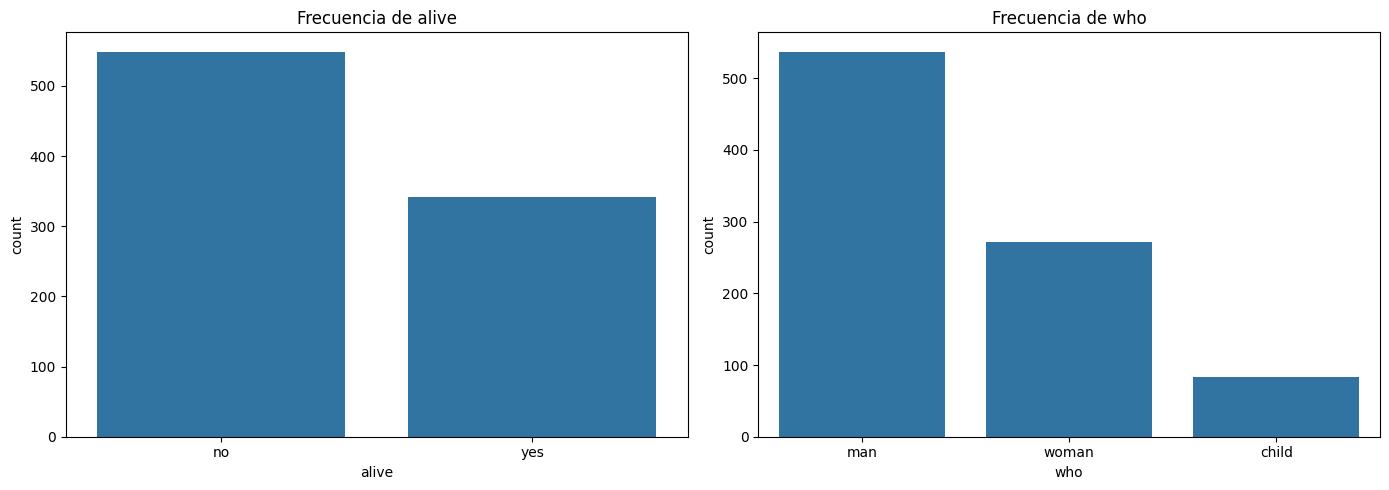

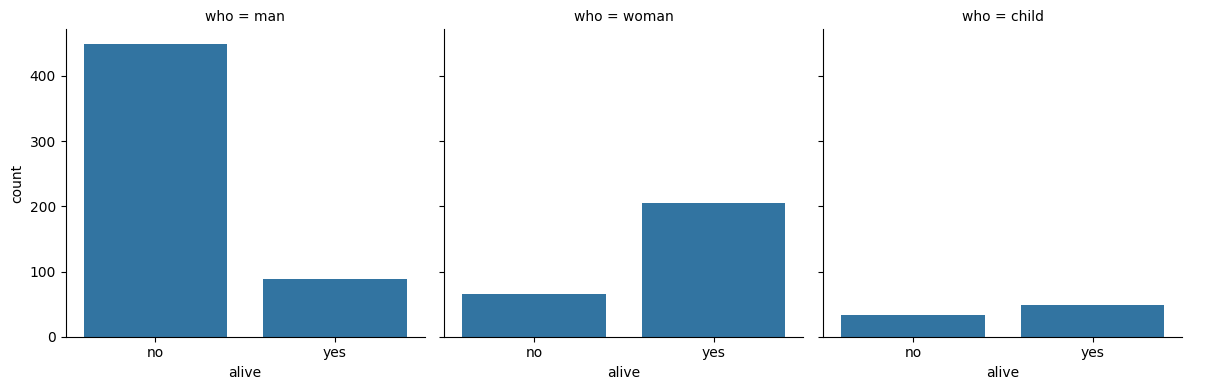

Tabla de contingencia:
who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205


In [4]:
tabla_alive_who = analizar_columnas_categoricas(df_titanic, 'alive', 'who')

#### Alive y Class

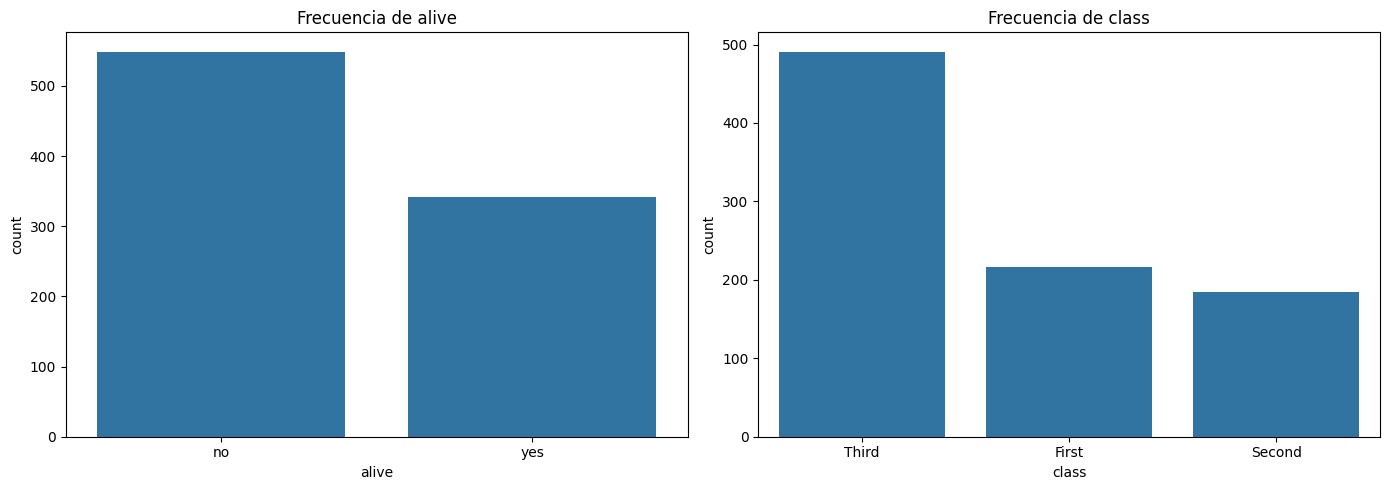

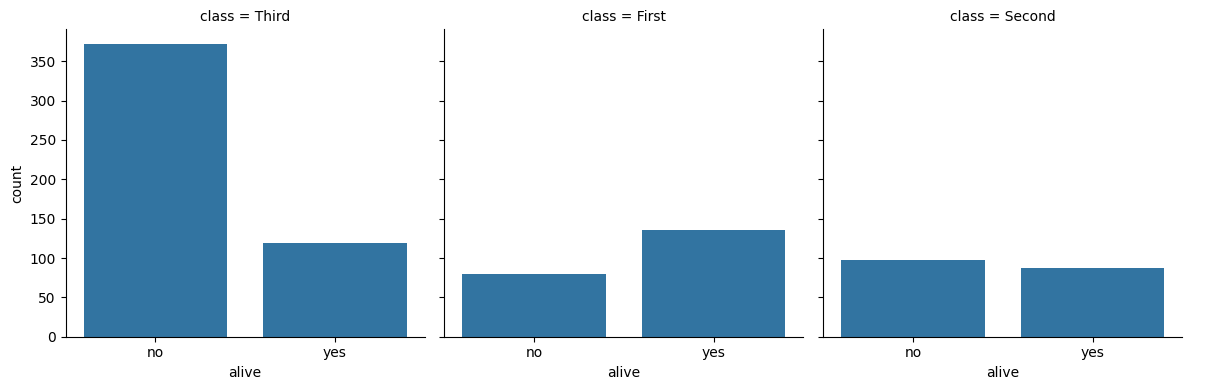

Tabla de contingencia:
class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119


In [5]:
tabla_alive_class = analizar_columnas_categoricas(df_titanic, 'alive', 'class')

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [6]:
def histograma_por_categoria(df, col_cat, col_num):
    categorias = df[col_cat].dropna().unique()
    n = len(categorias)
    cols = 3
    filas = (n + cols -1) // cols #Redondea hacia arriba
    fig, axes = plt.subplots(filas, cols, figsize=(5*cols, 4*filas))
    axes = axes.flatten() # Para poder iterar fácilmente

    for i, categoria in enumerate(categorias):
        subset = df[df[col_cat] == categoria][col_num].dropna()
        axes[i].hist(subset, bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histograma de {col_num} para {col_cat} = {categoria}')
        axes[i].set_xlabel(col_num)
        axes[i].set_ylabel('Frecuencia')
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

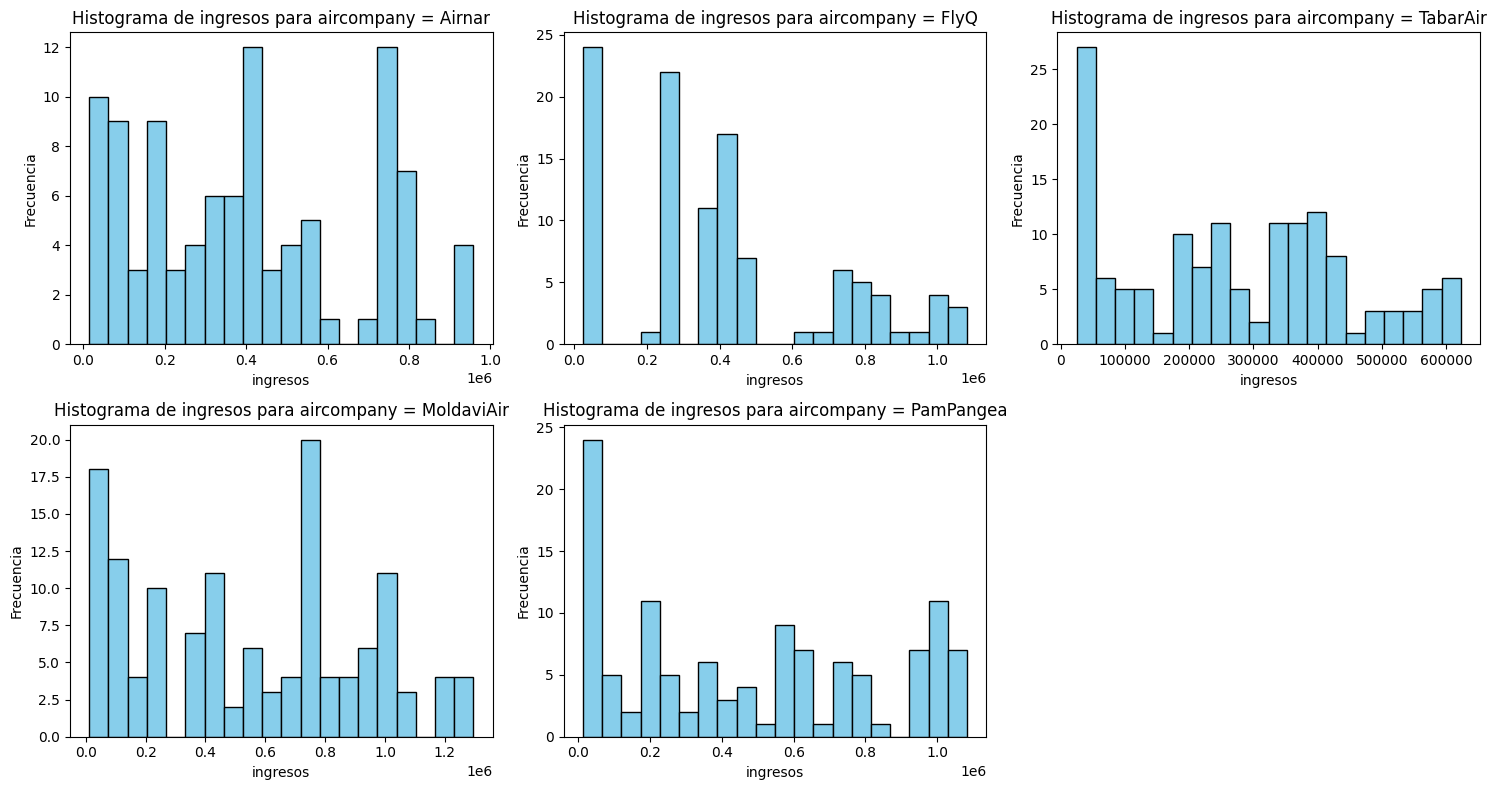

In [8]:
histograma_por_categoria(df_viajes, 'aircompany', 'ingresos')

#### Aircompany y Consumo_kg

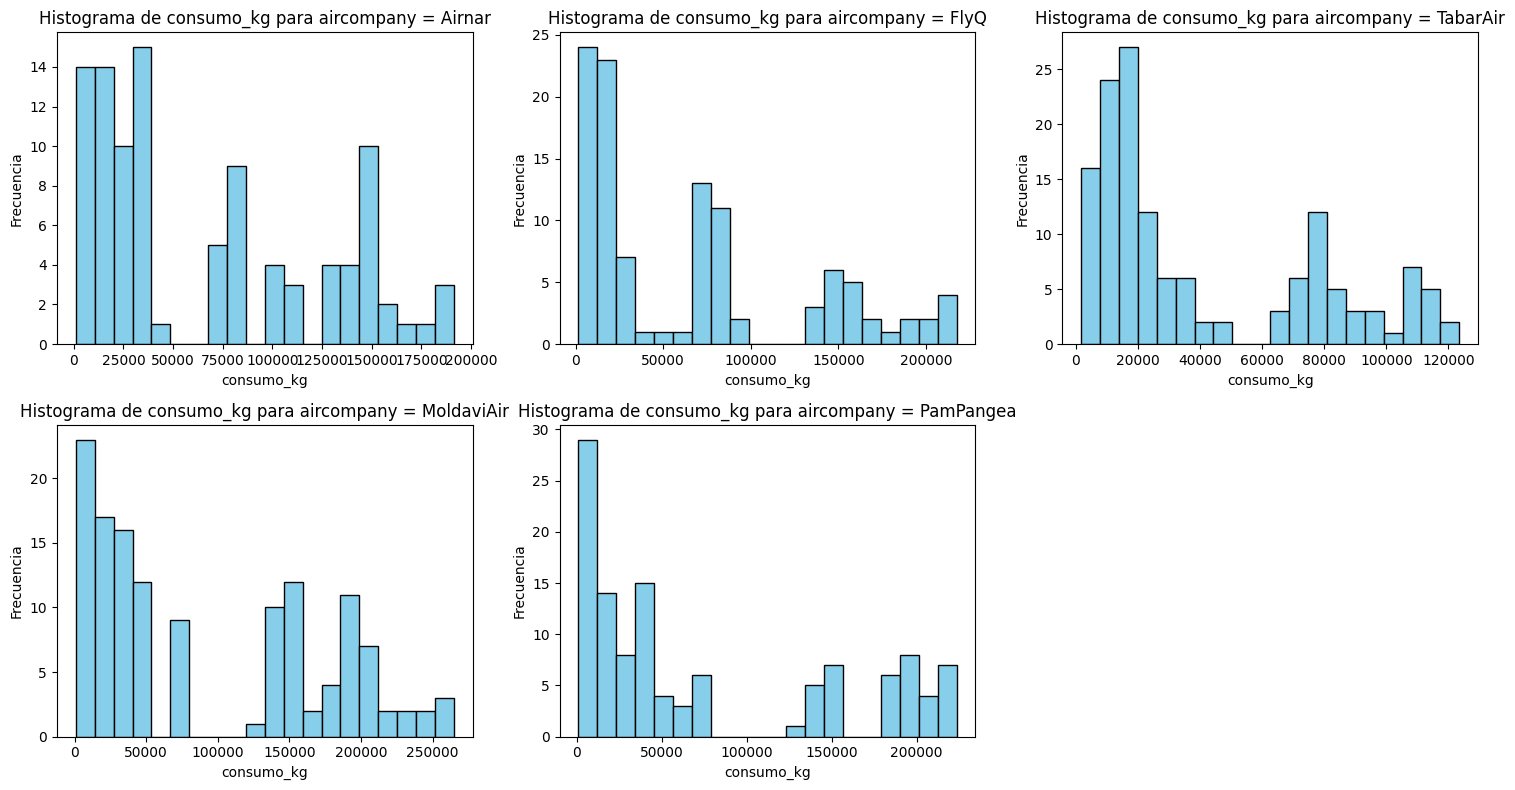

In [9]:
histograma_por_categoria(df_viajes, 'aircompany', 'consumo_kg')

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [10]:
def diagrama_dispersion(df, col_x, col_y, col_cat=None, size=50):
    plt.figure(figsize=(8,6))

    if col_cat:
        sns.scatterplot(data=df, x=col_x, y=col_y, hue=col_cat, s=size)
    else:
        sns.scatterplot(data=df, x=col_x,y=col_y, s=size)

    plt.title(f'Dispersión de {col_y} vs {col_x}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.tight_layout()
    plt.show()

### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

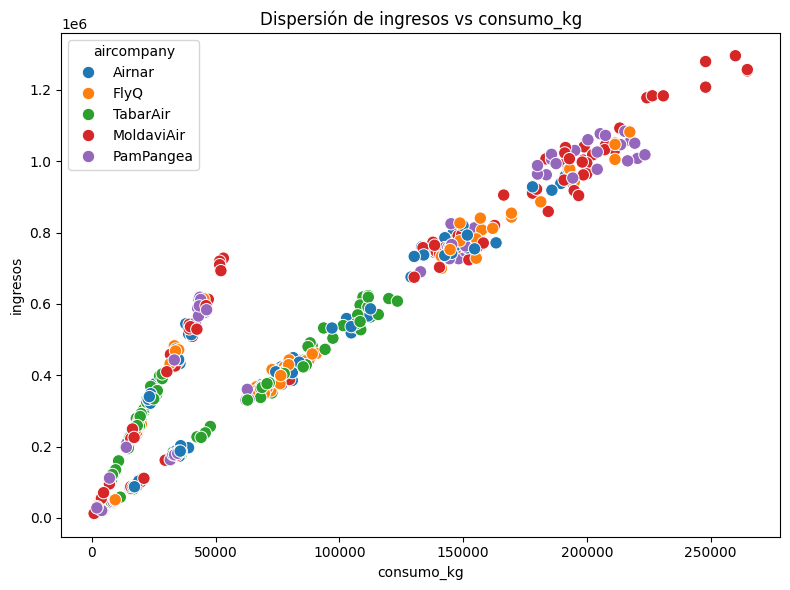

In [11]:
diagrama_dispersion(df_viajes, 'consumo_kg', 'ingresos', col_cat= 'aircompany', size=80)

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

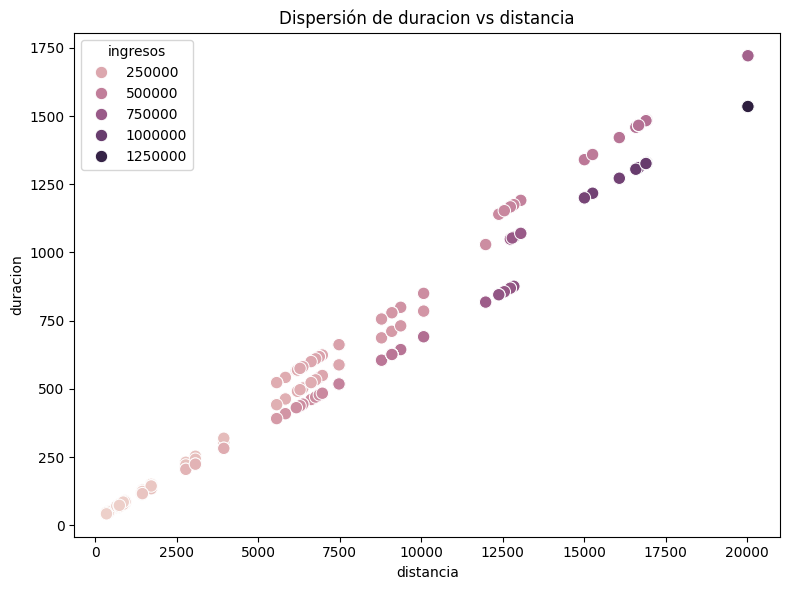

In [17]:
diagrama_dispersion(df_viajes, 'distancia', 'duracion', col_cat= 'ingresos', size=80)